#### 선형 회귀분석의 기초
- 회귀 분석용 샘플 데이터
- 회귀분석용 가상 데이터 생성 방법
- 선형 회귀분석의 기초
- 확률론적 선형회귀 모형
- 레버리지와 아웃라이어

#### 회귀 분석용 샘플 데이터 소개
- 보스턴 주택 가격 데이터
    - 1970년대 미국 보스턴의 주택 가격 데이터이다. load_boston() 명령으로 로드하며 다음과 같이 구성되어 있다.
    - 타겟 데이터
        - 1978 보스턴 주택 가격
        - 506 타운의 주택 가격 중앙값 (단위 1,000 달러)
    - 특징 데이터
        - CRIM: 범죄율
        - INDUS: 비소매상업지역 면적 비율
        - NOX: 일산화질소 농도
        - RM: 주택당 방 수
        - LSTAT: 인구 중 하위 계층 비율
        - B: 인구 중 흑인 비율
        - PTRATIO: 학생/교사 비율
        - ZN: 25,000 평방피트를 초과 거주지역 비율
        - CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
        - AGE: 1940년 이전에 건출된 주택의 비율
        - RAD: 방사형 고속도리까지의 거리
        - DIS: 직업센터의 거리
        - TAX: 재산세율
        - MEDV: Median value of owner-occupied homes in $1000's

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
dfx = pd.DataFrame(boston.data, columns = boston.feature_names)
dfy = pd.DataFrame(boston.target, columns = ['MEDV'])
df = pd.concat([dfx, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


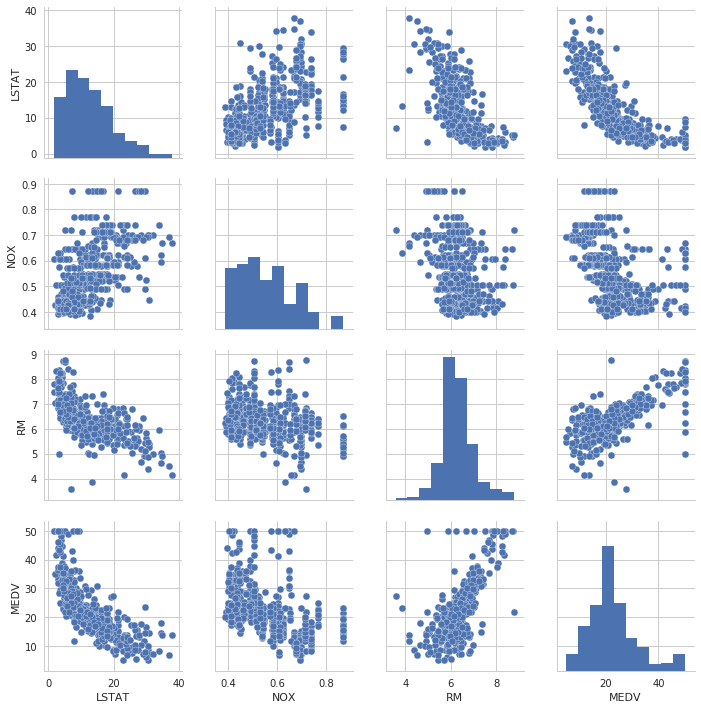

In [7]:
%matplotlib inline
cols = ['LSTAT', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols])
plt.show()

#### 당뇨병 데이터
- 442명의 당뇨병 환자의 검사 데이터이다. load_diabets() 명령으로 로드하며 다음과 같이 구성되어 있다.
    - 타겟 데이터
        - 1년 후의 당뇨병 진행도
    - 특징 데이터
        - 나이, 성병, BMI(body mass Index) 지수, 혈압 및 6개의 혈청 검사 수치
      

In [15]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.concat([pd.DataFrame(diabetes.data, columns = ['x%d' % (i + 1) for i in range(diabetes.data.shape[1])]),
                pd.DataFrame(diabetes.target, columns = ['target'])], axis = 1)
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [12]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


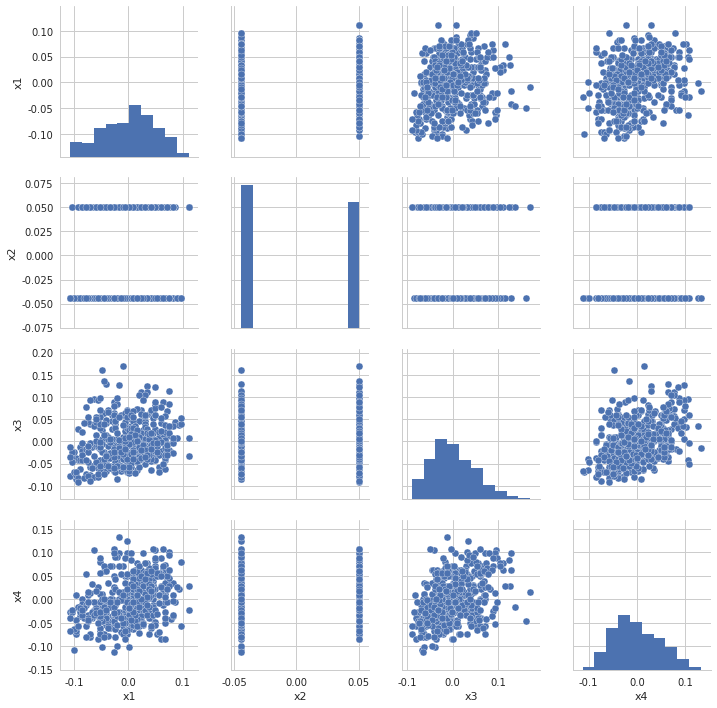

In [13]:
sns.pairplot(df.ix[:, :4])
plt.show()

In [14]:
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

#### 체력 검사 데이터
- 신체 상황 및 운동 능력을 측정한 데이터이다. load_linnerud() 명령으로 로드하며 다음과 같이 구성되어 있다.
    - 턱걸이, 앉았다 일어나기, 점프의 세가지 운동 능력
    - 체중, 허리 둘레, 맥박의 세가지 신체 상황

In [16]:
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()
print(linnerud.DESCR)

Linnerrud dataset

Notes
-----
Data Set Characteristics:
    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset constains two small dataset:

- *exercise*: A list containing the following components: exercise data with
  20 observations on 3 exercise variables: Weight, Waist and Pulse.

- *physiological*: Data frame with 20 observations on 3 physiological variables:
   Chins, Situps and Jumps.

References
----------
  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris: Editions Technic.



In [17]:
df = pd.concat([pd.DataFrame(linnerud.data, columns = linnerud.feature_names),
               pd.DataFrame(linnerud.target, columns=linnerud.target_names)], axis=1)
df.tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


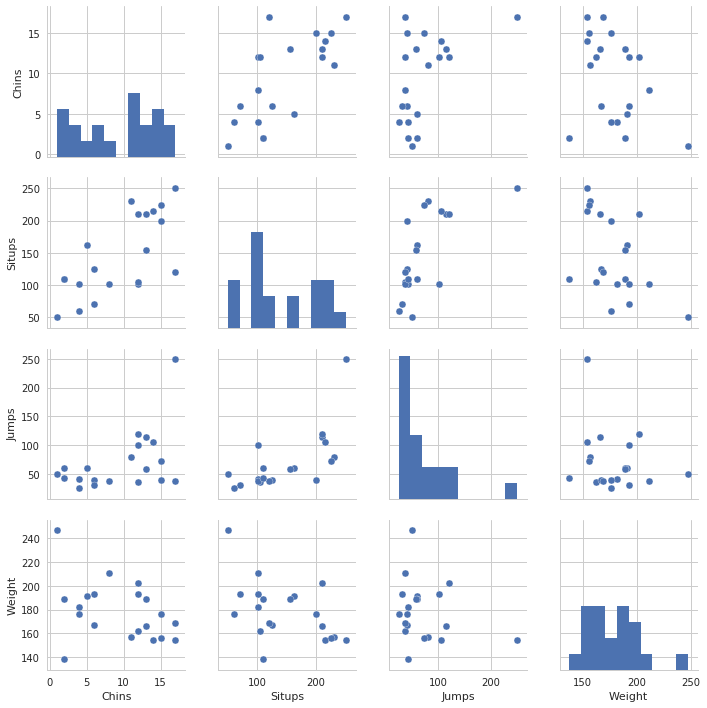

In [18]:
sns.pairplot(df.ix[:, :4])
plt.show()

#### 회귀분석용 가상 데이터 생성 방법
scikit-learn의 datasets 서브 패키지는 회귀분석용 가상 데이터를 생성하는 명령어인 make_regression()를 제공한다. make_regression()명령으로 만들어진 데이터는 종속 변수 y의 값이 독립변수 x벡터의 선형 조합인 선형 관계를 가진다. (b는 y절편 즉, 바이어스(bias) 값이다)
여기에 정규분포 e 만큼의 오차(disturbance)가 추가되는데 이 오차는 종속 변수 y에 영향을 미치는 요인 중에서 우리가 고려하지 않는 것들의 영향을 모두 합친것 이라고 생각하면 된다. 중심 극한 정리에 따라 이러한 모든 영향의 합은 정규분포를 따를 가능성이 높기 때문에 오차 e는 보통 기댓값이 0인 정규 분포 확률 변수로 가정한다.

make_regression()명령은 내부적으로 입력(독립 변수) 데이터인 X행렬, 오차벡터, 계수 w벡터를 확률적으로 생성한 후, 위 관계식에 따라 출력(종속 변수) 데이터 y 벡터를 계산하여 X, y 값을 출력한다. 

In [ ]:
X, y = make_regression(...)

In [ ]:
X, y, w = make_regression(..., coef=True, ...)

- 입력 인수는 다음과 같다.
    - n_samples: 정수 (옵션, 디폴트 100)
        - 표본 데이터의 갯수 N
    - n_features: 정수 (옵션, 디폴트 100)
        - 독립 변수(feature)의 수(차원) M
    - n_targets: 정수(옵션, 디폴트 1)
        - 종속 변수(target)의 수(차원)
    - bias: 실수 (옵션, 디폴트 0.0)
        - y 절편
    - noise: 실수 (옵션, 디폴트 0.0)
        - 출력 즉, 종속 변수에 더해지는 오차 e의 표준 편차
    - coef: 불리언 (옵션, 디폴트 False)
        - True이면 선형 모형의 계수도 출력
    - random_state: 정수 (옵션, 디폴트 None)
        - 난수 발생용 시드값
- 출력은 다음과 같다.
    - X : [n_samples, n_features] 형상의 2차원 배열
        - 독립 변수의 표본 데이터 행렬 X
    - y : [n_samples] 형상의 1차원 배열 또는 [n_samples, n_targets] 형상의 2차원 배열
        - 종속 변수의 표본 데이터 벡터 y
    - coef: [n_features] 형상의 1차원 배열 또는 [n_features, n_targets] 형상의 2차원 배열 (옵션)
        - 선형 모형의 계수 벡터 w, 입력 인수 coef가 True인 경우에만 출력 됨
다음은 독립 변수가 1개, 종속 변수가 1개이며 noise 인수값이 0이므로 오차가 없는 경우이다.

In [20]:
from sklearn.datasets import make_regression

X, y, w = make_regression(n_samples = 10, n_features = 1, bias=0, noise=0,
                         coef=True, random_state = 0)

In [21]:
X

array([[ 0.97873798],
       [ 2.2408932 ],
       [ 1.86755799],
       [ 0.95008842],
       [ 1.76405235],
       [ 0.4105985 ],
       [-0.97727788],
       [ 0.40015721],
       [-0.10321885],
       [-0.15135721]])

In [22]:
y

array([ 77.48913677, 177.41712535, 147.85924209,  75.22087885,
       139.66444108,  32.50811146, -77.37353667,  31.6814481 ,
        -8.17209494, -11.98332915])

In [23]:
w

array(79.17250381)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


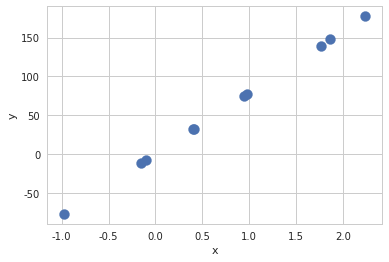

In [24]:
plt.scatter(X, y, s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

noise 인수를 증가시키면, Var[e]가 증가하고 bias 인수를 증가시키면 y 절편 b가 증가한다

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


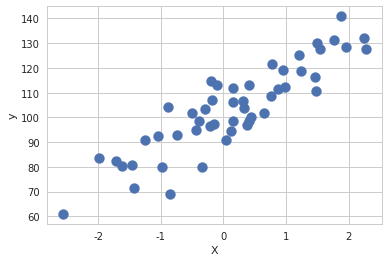

In [26]:
X, y, w = make_regression(n_samples = 50, n_features=1, bias=100, noise=10,
                         coef=True, random_state=0)
plt.scatter(X, y, s=100)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

#### 연습 문제 1
    1. make_regression과 같은 기능을 하는 함수 make_regression2를 만들어라.
    단 make_regression2는 coef=True라고 가정한다. 즉 항상 가중치 계수를 반환한다.
    또한 1차원 독립 변수만 생성할 수 있으므로 다음과 같은 인수만 가진다.
        - n_samples
        - bias
        - noise
        - random_state
    2. make_regression2함수에 coef 인수를 추가하여 make_regression3함수를 만들어라. make_regression3 함수는 가중치를 스스로 생성하지 않고 coef 인수로 받은 가중치 계수 값을 그대로 사용하며 가중치 계수를 반환하지 않는다.

In [74]:
def make_regression2(n_samples, bias, noise, random_state):
    from sklearn.datasets import make_regression
    return make_regression(n_samples=n_samples, bias=bias , noise=noise , random_state=random_state, n_features=1 ,coef=True)

In [85]:
X, y, w = make_regression2(n_samples=10, bias=10, noise=10, random_state=0)
w

array(79.17250381)

In [84]:
X, y, w = make_regression(n_samples=10, bias=10, noise=10, random_state=0, coef=True, n_features = 1)
w

array(79.17250381)

In [1]:
def make_regression2(n_samples, bias, noise, random_state, coef):
    from sklearn.datasets import make_regression
    return make_regression(n_samples=n_samples, bias=bias , noise=noise , random_state=random_state, n_features=1 ,coef=True)

In [99]:
%matplotlib inline

In [108]:
def make_regression2(n_sample, bias, noise, random_state):
    from sklearn.datasets import make_regression
    np.random.seed(0)
    X = np.random.rand(n_sample) * 100
    W = np.random.rand(1) * 1
    t = np.random.randn(n_sample) * noise 
    Y = X * W + bias + t 
    return X, W, Y

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


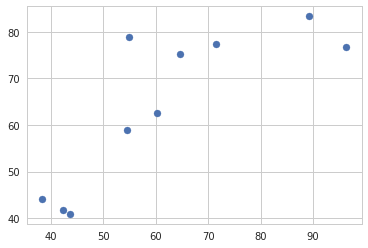

In [110]:
a, b, c = make_regression2(10, 10, 10, 1)
plt.scatter(a, c)
plt.show()